In [9]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
# from collections import Counter
import numpy as np
import seaborn as sns
import sys
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
with open("merged_df.csv", encoding="utf-8") as f:
    df = pd.read_csv(f, delimiter=",")

df.head()

,Unnamed: 0.1,Unnamed: 0,company_name,rating,location,size,industry,street_number,street_name,town,...,"Land- und Forstwirtschaft, Fischerei (A)",Produzierendes Gewerbe (B-F),"Handel, Verkehr, Gast- gewerbe (G-I)",Erbrin- gung von Unternehmensdienstleistungen\n(J-N),Erbringung von öffentl. u. privaten Dienstleistungen (O-U),Industry with most employees,Number of Foreigners per Gemeinde,Foreigners as % of Population,Raw population Gain or Loss,Per 1000 Inhabitants
0,0,0,Kern (Germany),4.0,Saarland,1 to 50 Employees,Enterprise Software & Network Solutions,120,In der Kolling,Bexbach,...,17,1 409,1 472,762,915,"Handel, Verkehr, Gast- gewerbe (G-I)",521,"7,0",41.0,"+ 2,3"
1,1,1,NEUE HALBERG-GUSS,3.4,Saarland,1001 to 5000 Employees,Transportation Equipment Manufacturing,16,Kirchstraße,Saarbrücken,...,107,21 412,20 730,31 533,38 149,Erbringung von öffentl. u. privaten Dienstleis...,18 551,"19,2",-277.0,"- 1,5"
2,2,2,Ford Motor Company,4.1,Saarland,10000+ Employees,Transportation Equipment Manufacturing,18-30,Roonstraße,Dillingen/Saar,...,NaN,8 181,1 836,1 307,3 142,Produzierendes Gewerbe (B-F),1 532,"16,9",58.0,"+ 2,9"
3,3,3,Kärcher,3.4,Saarland,10000+ Employees,Machinery Manufacturing,269,Provinzialstraße,Ensdorf,...,.,200,901,.,390,"Handel, Verkehr, Gast- gewerbe (G-I)",168,"14,0",62.0,"+ 9,6"
4,4,4,MTD Products,3.5,Saarland,5001 to 10000 Employees,Machinery Manufacturing,23,Industriestraße,Saarbrücken,...,107,21 412,20 730,31 533,38 149,Erbringung von öffentl. u. privaten Dienstleis...,18 551,"19,2",-277.0,"- 1,5"


In [3]:
df.shape

(142, 32)

In [4]:
df.dtypes

Unnamed: 0.1                                                    int64
Unnamed: 0                                                      int64
company_name                                                   object
rating                                                        float64
location                                                       object
size                                                           object
industry                                                       object
street_number                                                  object
street_name                                                    object
town                                                           object
district                                                       object
state                                                          object
postal_code                                                   float64
formatted_address                                              object
lat                 

In [5]:
df["size"].unique()

array(['1 to 50 Employees', '1001 to 5000 Employees', '10000+ Employees',
       '5001 to 10000 Employees', '51 to 200 Employees',
       '501 to 1000 Employees', '201 to 500 Employees'], dtype=object)

In [6]:
df = df.dropna(subset = ['industry'], axis =0)
# df = df.dropna(subset = ["Rechtsform"], axis=0)
df.shape

(142, 32)

In [7]:
branche_counts = df["industry"].value_counts()
branche_counts

Transportation Equipment Manufacturing     18
Machinery Manufacturing                    16
Department, Clothing & Shoe Stores         16
HR Consulting                              15
Consumer Product Manufacturing             13
Information Technology Support Services    13
Energy & Utilities                         11
Health Care Services & Hospitals           11
Home Furniture & Housewares Stores         11
Enterprise Software & Network Solutions     9
Banking & Lending                           9
Name: industry, dtype: int64

## Assign integers to categorical data
possible features: rating, size, industry, km2, einwohner, industry with most employees

In [8]:
# d = dict()
# for i, x in enumerate(df["Rechtsform"].unique()):
#     d[x] = i
# df['Rechtsform'] = df['Rechtsform'].map(d) # what happens with n/a's?

# d = dict()
# for i, x in enumerate(df["rating"].unique()):
    # d[x] = i
# df["rating"] = df["rating"].map(d)

d = dict()
for i, x in enumerate(df["size"].unique()):
    d[x] = i
df["size"] = df["size"].map(d)

d = dict()
for i, x in enumerate(df["Grundstückspreise in € pro m²"].unique()):
    d[x] = i
df["Grundstückspreise in € pro m²"] = df["Grundstückspreise in € pro m²"].map(d)

d = dict()
for i, x in enumerate(df["industry"].unique()):
    d[x] = i
df["industry"] = df["industry"].map(d)

d = dict()
for i, x in enumerate(df["Gemeinde"].unique()):
    d[x] = i
df["Gemeinde"] = df["Gemeinde"].map(d)

d = dict()
for i, x in enumerate(df["town"].unique()):
    d[x] = i
df["town"] = df["town"].map(d)

## Decision Tree
using 10 fold cross validation (or not if too complicated)

In [40]:
features = ["size", "industry", "rating"]
X = df[features]
y = df["Gemeinde"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)
print(X_train.shape, X_test.shape)

# dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 7, min_samples_leaf = 3)
dtree = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3)
# dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

# Performing training
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print ("Accuracy:", accuracy_score(y_test,y_pred)*100, "%")
# print("Report:\n", classification_report(y_test, y_pred))

(127, 3) (15, 3)
Accuracy: 46.666666666666664 %


### Results
with master dataset
- dataset size: 142, training split: 127 (90%), test split: 15 (10%) (that is too small because not every class (Gemeinde) is represented adequately in this dataset)
- features: size, industry, rating
- output: Gemeinde (34 classes)
- model parameters: criterion: gini, random_state=100, max_depth=3 (helps with overfitting(?))
- model performance: accuracy: 46.7%
- decision tree constructed as in picture generated below

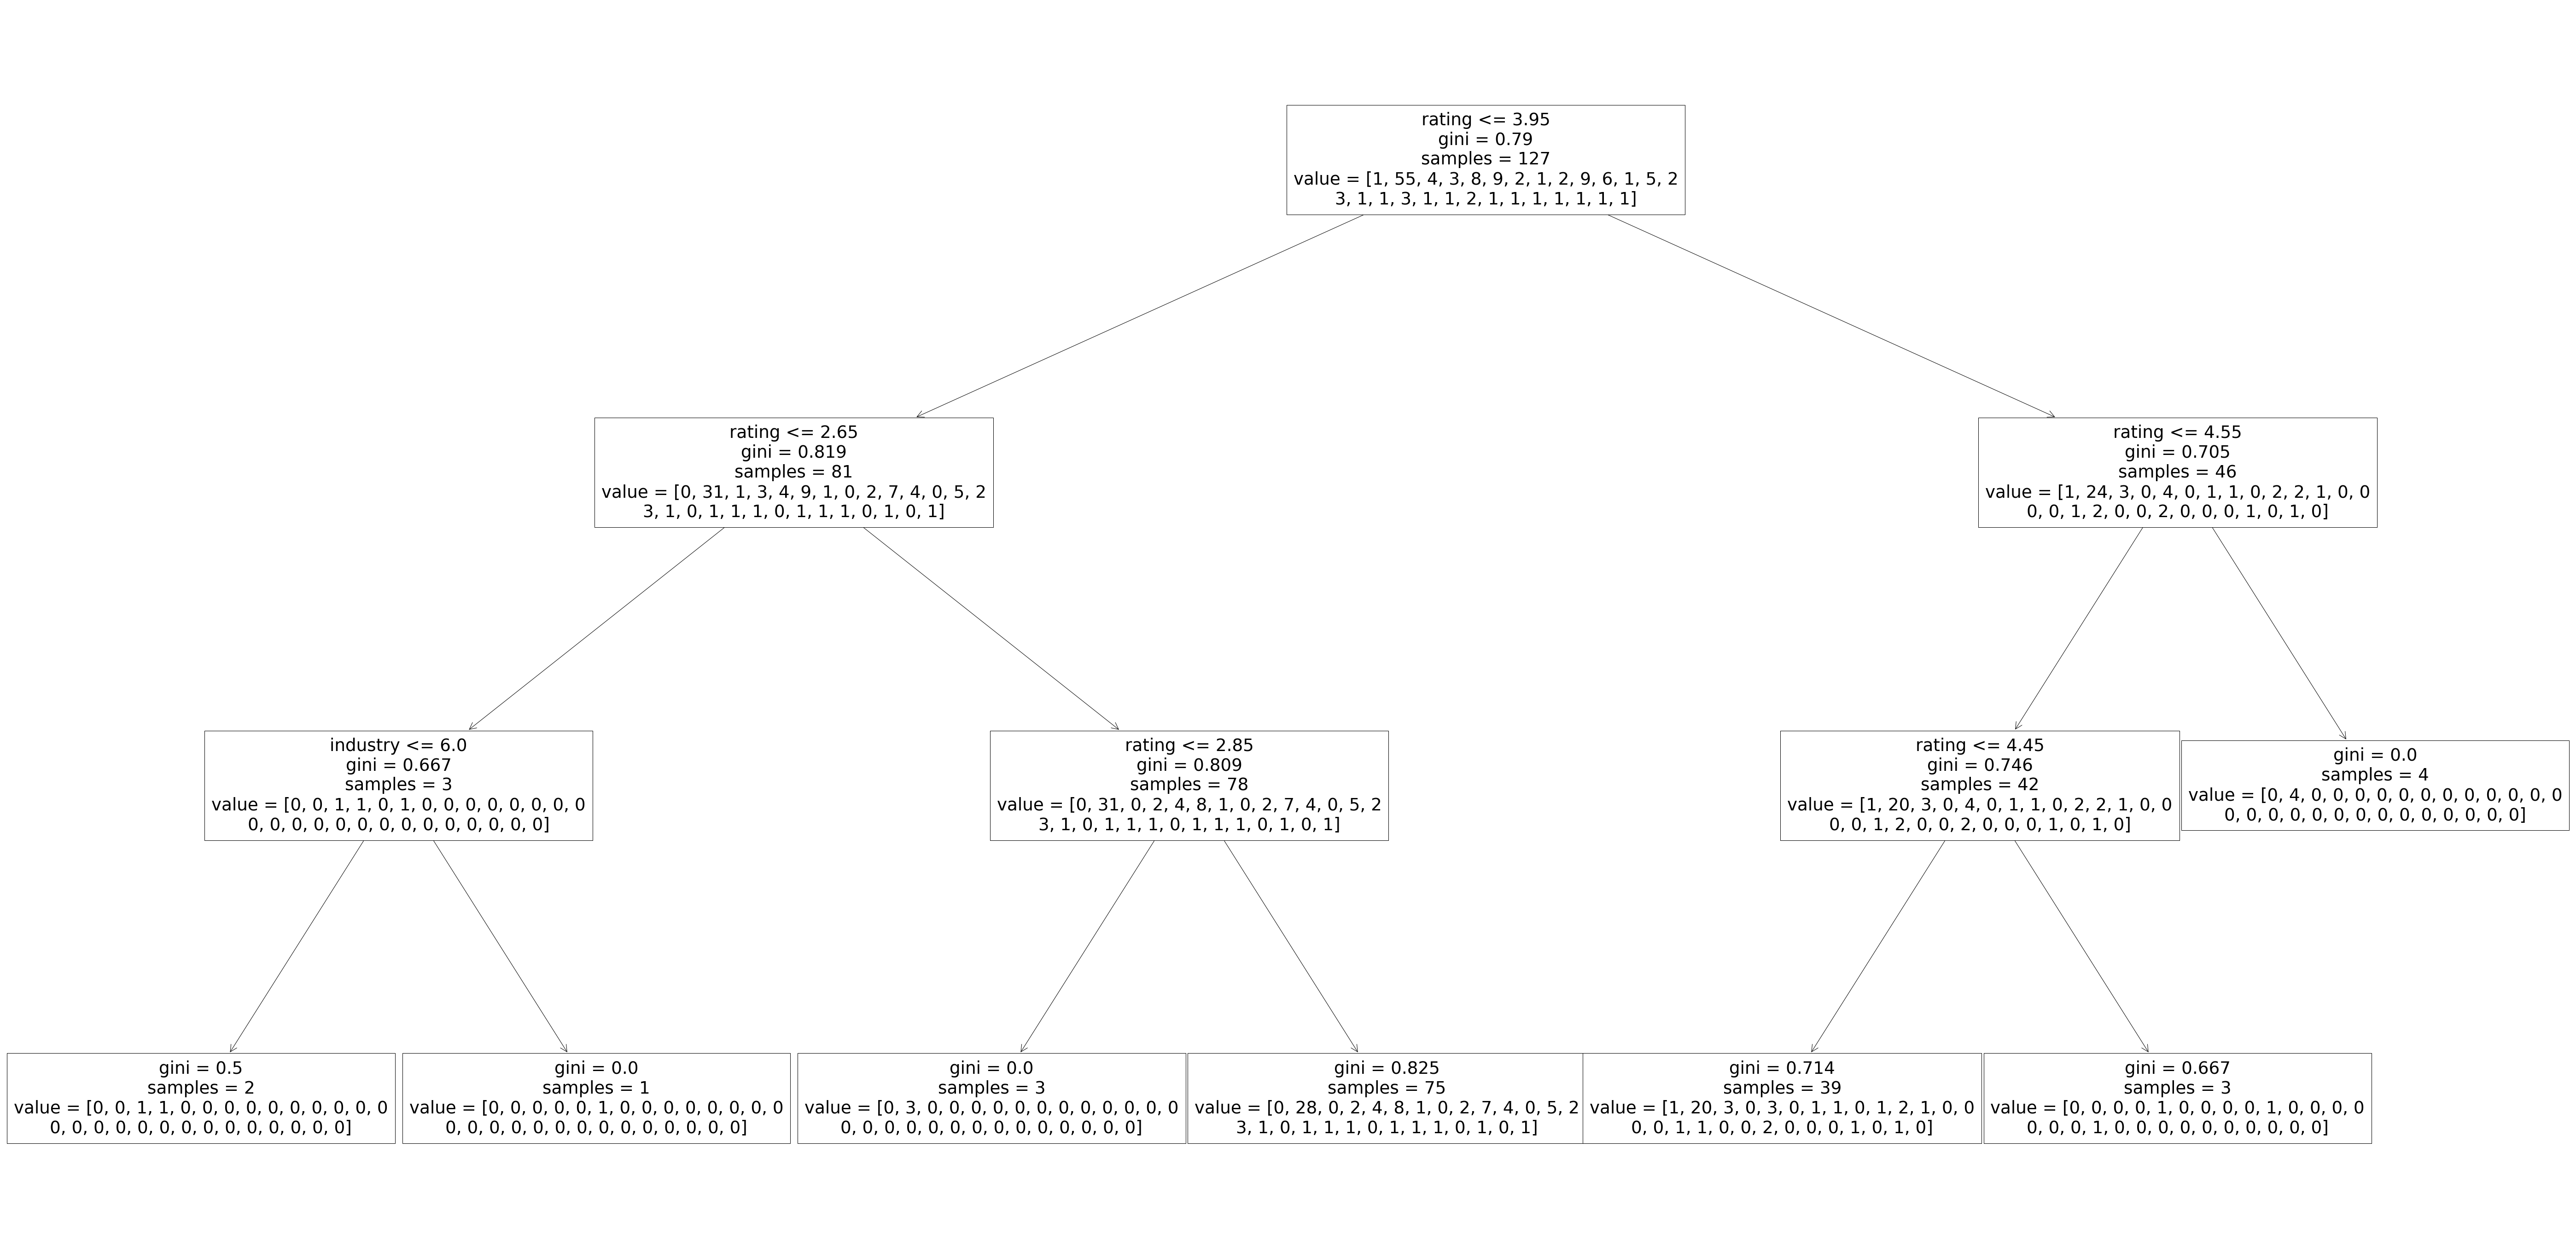

In [41]:
# plt.figure(figsize=(40,20))  # customize according to the size of your tree
plt.figure(figsize=(100,50))
_ = tree.plot_tree(dtree, feature_names = X.columns)
plt.savefig("tree.png")
plt.show()